# MicroSoft Store App Analysis 

Microsoft Store (Digital) is a digital distribution platform owned by Microsoft serving as the unified distribution point for apps, console games, and digital videos (like App Store in Apple). Exploratory data analysis of user data always have revealed surprisingly useful insights about the products.  This notebook is an analysis for Microsoft Windows App Data. 

![](452212.jpg)

In this notebook , we will see following content: 
* The distribution of the rating (ie, I want to see the rating score of most Apps) 
* Which category has the highest average rating ? 
* Which category is most popular ? 
* How is the distribution look like for paid APPS ? 
* Which is the most expensive App ? 

## Distribution of rating 

In [75]:
# Import some useful libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline 
import plotly.express as px 
import plotly.graph_objects as go

In [22]:
import chart_studio.plotly as py 
import cufflinks as cf 
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot 
init_notebook_mode(connected= True) 
cf.go_offline() 

In [9]:
df = pd.read_csv('msft.csv',index_col = False)

In [10]:
df.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


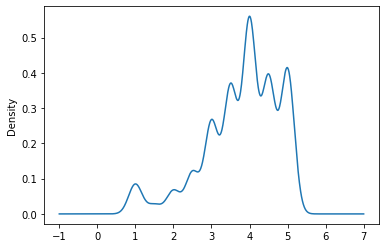

In [14]:
df['Rating'].plot(kind = 'kde') 
plt.show() 

From this kernal density plot, I can see that the rating around 4 has the highest density. However, this plot is not clear if I want to know the rating distribution depends on category. 

In [20]:
fig = px.pie(df, names='Rating',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Distribution of Ratings', font_size=15)
fig.show() 

## Which category has the highest average rating 

In [23]:
bycategory  = df.groupby('Category')

In [45]:
df_cate = round(bycategory[['Rating','No of people Rated']].mean(),3)

In [46]:
df_cate = df_cate.reset_index()

In [47]:
fig = px.scatter(df_cate, x='Rating', y='Category', color='Category',size = 'No of people Rated')
fig.update_layout(title="Average Rating For Each Category")
fig.show()

From this plot, we can see that the Category `Goverment and Politics` has the highest Rating but it has the least people rated. The category `Multimedia Design` has the most number of people rated even thoufgh its rating is the lowest.

In [115]:
df_cate.iplot(kind = 'bar',x = 'Category',y = 'Rating',theme='white',color = '#3464eb')

## Distribution of Paid Apps  VS. Free Apps

In [63]:
percentage_free = format(df.Price.value_counts()['Free']/len(df)*100, '0.2f')

In [70]:
df1 = df['Price']!='Free'

In [71]:
df1.value_counts() # That means there are 159 Paid App 

False    5163
True      159
Name: Price, dtype: int64

In [79]:
percentage_paid = format(159/len(df)*100)

In [80]:
colors = ['#2d83a8', '#32a852']

fig = go.Figure(data=[go.Pie(labels=['Free Apps','Paid Apps'],
                             values=[percentage_free, percentage_paid])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of Paid Apps & Free Apps', font_size=15)
fig.show()

We can easily see the comparison between Paid Apps and Free Apps.

## Which App is the most expensive ? 

In [81]:
df_notfree = df[df['Price'] != 'Free']

In [90]:
df_notfree.head()

,Name,Rating,No of people Rated,Category,Date,Price
5163,Bluestacks app player: guide,1.5,760,Books,16-12-2019,₹ 144.00
5164,Adobe Acrobat Reader DC PC Guide,2.0,163,Books,28-06-2020,₹ 144.00
5165,Play Books Online (Client For Google Books),2.5,292,Books,14-01-2016,₹ 54.00
5166,WinRAR PC-Guide,1.0,523,Books,22-11-2019,₹ 99.00
5167,Windows Movie Maker : PC Guide,1.0,515,Books,22-06-2020,₹ 144.00


In [107]:
df_notfree.iplot(kind = 'scatter',x = 'Rating', y = 'Price',mode = 'markers',color = '#35e5e8',theme = 'Solar')

We can see that the price of the most expensive app is 5449.00 with rating 3. We can get its name by data manipulation 

In [96]:
df_notfree[df_notfree['Rating'] == 3]

,Name,Rating,No of people Rated,Category,Date,Price
5175,Oxford Dictionary of English and Thesaurus,3.0,290,Books,23-01-2015,"₹ 1,624.00"
5201,Wikipedia-Search,3.0,117,Books,14-05-2019,₹ 54.00
5215,EZ Genealogy,3.0,937,Books,20-05-2020,₹ 109.00
5233,PDF Reader for Adobe PDF,3.0,354,Business,31-12-2019,₹ 574.00
5238,WebExHelper,3.0,397,Business,03-02-2017,₹ 54.00
5281,Pengwin Enterprise,3.0,368,Developer Tools,29-11-2018,"₹ 5,449.00"
5284,IP Scanner - Search for available IP addresses...,3.0,725,Developer Tools,22-08-2019,₹ 114.00
5286,Centos8,3.0,254,Developer Tools,25-05-2020,₹ 219.00
5290,Python Playground,3.0,457,Developer Tools,23-08-2018,₹ 54.00
5316,Get Color,3.0,785,Developer Tools,08-08-2019,₹ 54.50


The Name is Pengwin Enterprise. 